In [8]:
#Stefan Basurto - Look this guy up
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('cs.csv', index_col = "Date")
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
8/20/2014,198.119995,199.160004,198.080002,198.919998,180.141846,72763000
8/21/2014,199.089996,199.759995,198.929993,199.500000,180.667160,67791000
8/22/2014,199.339996,199.690002,198.740005,199.190002,180.386368,76107000
8/25/2014,200.139999,200.589996,199.149994,200.199997,181.301010,63855000
8/26/2014,200.330002,200.820007,200.279999,200.330002,181.418716,47298000
8/27/2014,200.429993,200.570007,199.940002,200.250000,181.346298,47874000
8/28/2014,199.589996,200.270004,199.389999,200.139999,181.246689,58330000
8/29/2014,200.449997,200.729996,199.820007,200.710007,181.762909,65907000
9/2/2014,200.970001,201.000000,199.860001,200.610001,181.672318,72426000


In [9]:
close = df['Adj Close']
close.index = pd.to_datetime(close.index)

close

Date
2014-08-20    180.141846
2014-08-21    180.667160
2014-08-22    180.386368
2014-08-25    181.301010
2014-08-26    181.418716
                 ...    
2019-08-13    292.549988
2019-08-14    283.899994
2019-08-15    284.649994
2019-08-16    288.850006
2019-08-19    292.329987
Name: Adj Close, Length: 1258, dtype: float64

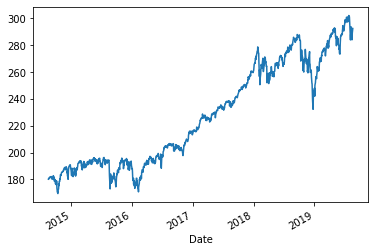

In [10]:
close.plot()
plt.show()

In [11]:
#SMA = simple moving average
#first 49 willbe empty because we don't have all all 50 values yet
sma50 = close.rolling(window=50).mean()
sma50

Date
2014-08-20           NaN
2014-08-21           NaN
2014-08-22           NaN
2014-08-25           NaN
2014-08-26           NaN
                 ...    
2019-08-13    293.540820
2019-08-14    293.635375
2019-08-15    293.696567
2019-08-16    293.805137
2019-08-19    293.926582
Name: Adj Close, Length: 1258, dtype: float64

In [12]:
sma50.iloc[45:52]

Date
2014-10-23           NaN
2014-10-24           NaN
2014-10-27           NaN
2014-10-28           NaN
2014-10-29    178.725250
2014-10-30    178.750461
2014-10-31    178.806655
Name: Adj Close, dtype: float64

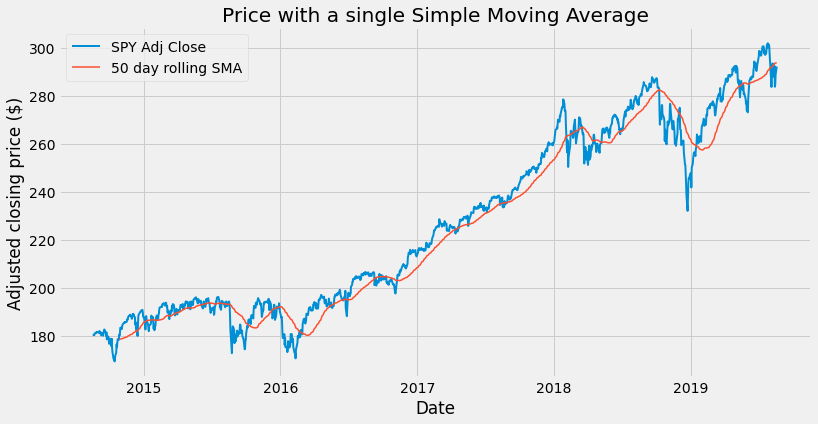

In [13]:
#One Rolling Average
plt.style.use('fivethirtyeight')
#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting price and SMA lines:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()
plt.show()

#Basics - When ADJ Close is going up and crosses the SMA = buy
#When ADJ Close is going down and corsses the SMA = sell

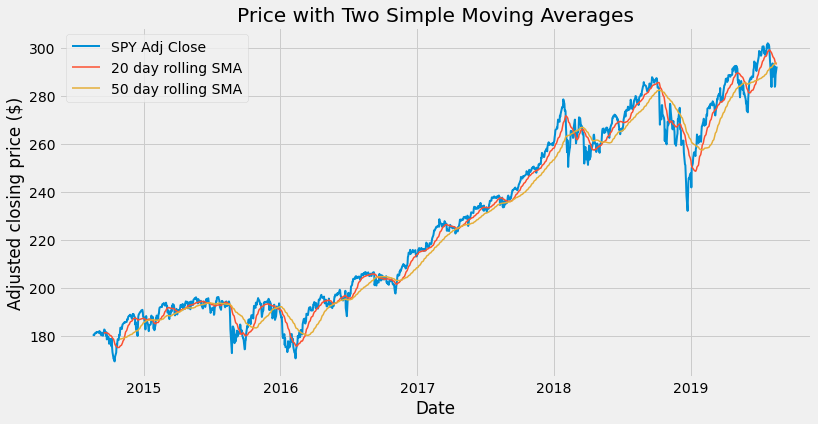

In [14]:
#Comparison of Two Rolling Averages
sma20 = close.rolling(window=20).mean()
plt.figure(figsize = (12,6))
#Plotting price with two SMAs:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma20, label='20 day rolling SMA', linewidth = 1.5)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages')
plt.legend()
plt.show()


In [15]:
#Plot Getting too Messy Creating New Dataframe that compares SMA50 to SMA20
priceSma_df = pd.DataFrame({
      'Adj Close' : close,
      'SMA 20' : sma20,
      'SMA 50' : sma50
     })
priceSma_df

,Adj Close,SMA 20,SMA 50
Date,,,
2014-08-20,180.141846,NaN,NaN
2014-08-21,180.667160,NaN,NaN
2014-08-22,180.386368,NaN,NaN
2014-08-25,181.301010,NaN,NaN
2014-08-26,181.418716,NaN,NaN
...,...,...,...
2019-08-13,292.549988,295.381998,293.540820
2019-08-14,283.899994,294.689998,293.635375
2019-08-15,284.649994,293.980998,293.696567


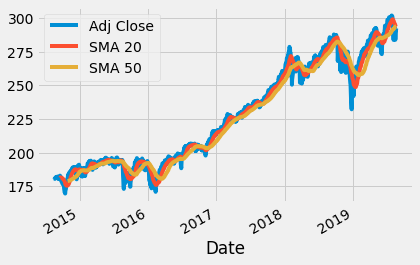

In [16]:
#Easy to create snap plot with info in the dataframe

priceSma_df.plot()
plt.show()

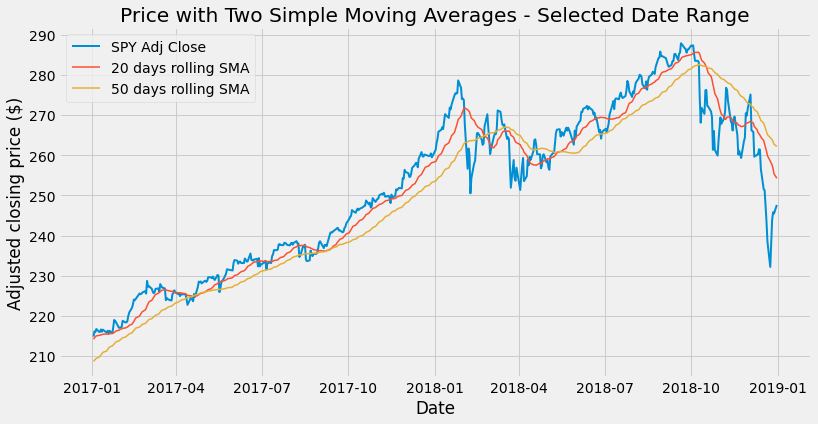

In [17]:
#More Concise plotting
plt.figure(figsize = (12,6))
#Plotting price and two SMAs with a specified date range:
plt.plot(priceSma_df['2017':'2018']['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df['2017':'2018']['SMA 20'], label='20 days rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df['2017':'2018']['SMA 50'], label='50 days rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages - Selected Date Range')
plt.legend()
plt.show()
#Two Rolling Averages Allow for the Crossover Method
#When Shorter Average (SMA20) Crossess Longer Average (SMA50) Buy
#Vice Versa Sell
#less Risk but more delay 

In [18]:
#Is three better than two?
sma200 = close.rolling(window=200).mean()
priceSma_df['SMA 200'] = sma200
priceSma_df

,Adj Close,SMA 20,SMA 50,SMA 200
Date,,,,
2014-08-20,180.141846,NaN,NaN,NaN
2014-08-21,180.667160,NaN,NaN,NaN
2014-08-22,180.386368,NaN,NaN,NaN
2014-08-25,181.301010,NaN,NaN,NaN
2014-08-26,181.418716,NaN,NaN,NaN
...,...,...,...,...
2019-08-13,292.549988,295.381998,293.540820,277.238597
2019-08-14,283.899994,294.689998,293.635375,277.327894
2019-08-15,284.649994,293.980998,293.696567,277.444337


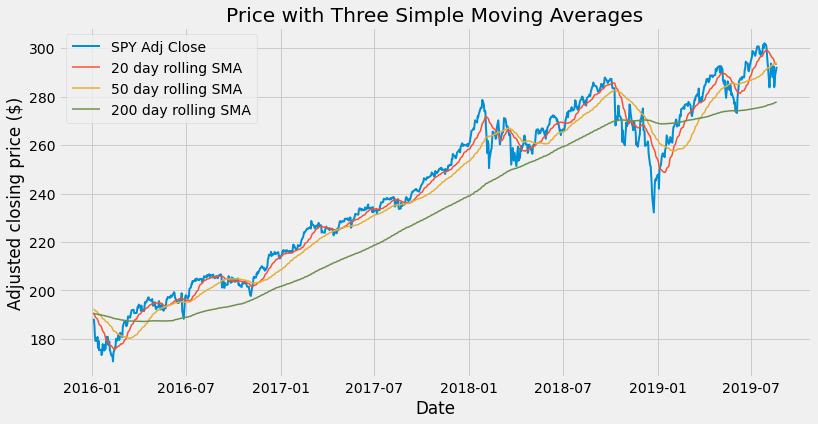

In [19]:
#Our start and end dates:
start = '2016'
end = '2019'
plt.figure(figsize = (12,6))
#Plotting price and three SMAs with start and end dates:
plt.plot(priceSma_df[start:end]['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df[start:end]['SMA 20'], label='20 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 50'], label='50 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 200'], label='200 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Three Simple Moving Averages')
plt.legend()
plt.show()
#This method casues a lot more delay but reduces risk significantly
#Good for long term trading

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [29]:
plt.style.use('fivethirtyeight')

datafile = 'stocks.csv'

df_moving = pd.read_csv(datafile, index_col = 'Date')
df_moving.dropna(axis=0, inplace=True)

df_moving.head(20)


,Unnamed: 0,Price,10-day SMA,10-day WMA,Smoothing Constant 2/(10 + 1),10-day EMA
Date,,,,,,
8-Apr-10,11.0,22.154,22.213,22.234,0.1818,22.212
9-Apr-10,12.0,22.393,22.233,22.266,0.1818,22.245
12-Apr-10,13.0,22.382,22.262,22.293,0.1818,22.270
13-Apr-10,14.0,22.611,22.306,22.357,0.1818,22.332
14-Apr-10,15.0,23.356,22.423,22.548,0.1818,22.518
15-Apr-10,16.0,24.052,22.615,22.844,0.1818,22.797
16-Apr-10,17.0,23.753,22.767,23.051,0.1818,22.971
19-Apr-10,18.0,23.832,22.907,23.244,0.1818,23.127
20-Apr-10,19.0,23.952,23.078,23.434,0.1818,23.277


In [30]:
weights = np.arange(1, 11) #this creates an array with integers 1 to 10 included

weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [31]:
wma10 = df_moving['Price'].rolling(10).apply(lambda prices: np.dot(prices, weights)/ weights.sum(), raw= True)

wma10.head(20)

Date
8-Apr-10           NaN
9-Apr-10           NaN
12-Apr-10          NaN
13-Apr-10          NaN
14-Apr-10          NaN
15-Apr-10          NaN
16-Apr-10          NaN
19-Apr-10          NaN
20-Apr-10          NaN
21-Apr-10    23.535582
22-Apr-10    23.646691
23-Apr-10    23.736364
26-Apr-10    23.759509
27-Apr-10    23.674618
28-Apr-10    23.563073
29-Apr-10    23.497673
30-Apr-10    23.328200
3-May-10     23.254036
4-May-10     23.066855
5-May-10     22.866018
Name: Price, dtype: float64

In [32]:
df_moving['Our 10-day WMA'] = np.round(wma10, decimals=3)

df_moving[['Price', '10-day WMA', 'Our 10-day WMA']].head(20)

,Price,10-day WMA,Our 10-day WMA
Date,,,
8-Apr-10,22.154,22.234,NaN
9-Apr-10,22.393,22.266,NaN
12-Apr-10,22.382,22.293,NaN
13-Apr-10,22.611,22.357,NaN
14-Apr-10,23.356,22.548,NaN
15-Apr-10,24.052,22.844,NaN
16-Apr-10,23.753,23.051,NaN
19-Apr-10,23.832,23.244,NaN
20-Apr-10,23.952,23.434,NaN


Date
8-Apr-10     22.154
9-Apr-10     22.393
12-Apr-10    22.382
13-Apr-10    22.611
14-Apr-10    23.356
15-Apr-10    24.052
16-Apr-10    23.753
19-Apr-10    23.832
20-Apr-10    23.952
21-Apr-10    23.634
22-Apr-10    23.823
23-Apr-10    23.872
26-Apr-10    23.654
27-Apr-10    23.187
28-Apr-10    23.098
29-Apr-10    23.326
30-Apr-10    22.681
3-May-10     23.098
4-May-10     22.403
5-May-10     22.173
Name: Price, dtype: float64


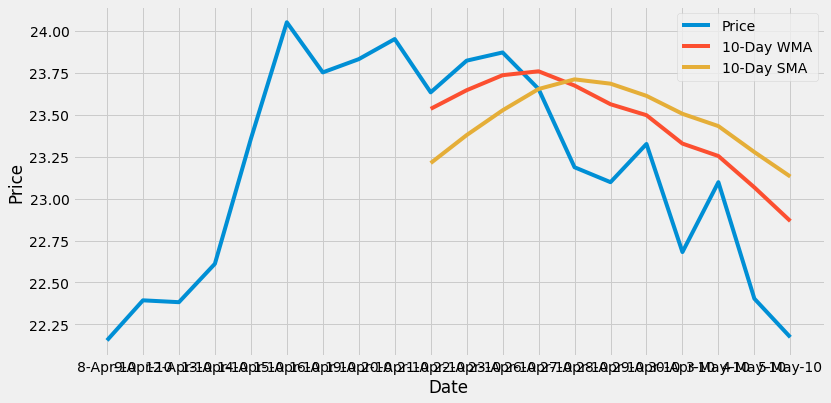

In [34]:
sma10 = df_moving['Price'].rolling(10).mean()

print(df_moving['Price'])

plt.figure(figsize= (12, 6))
  

plt.plot(df_moving['Price'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.plot(sma10, label="10-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [38]:
#Using the ewm method will cause descripancies because it has a different definition than the 10-day EMA formula 
ema10 = df_moving['Price'].ewm(span=10).mean()
ema10.head(10)

Date
8-Apr-10     22.154000
9-Apr-10     22.285450
12-Apr-10    22.324262
13-Apr-10    22.418730
14-Apr-10    22.687795
15-Apr-10    23.042126
16-Apr-10    23.213418
19-Apr-10    23.354148
20-Apr-10    23.484220
21-Apr-10    23.515682
Name: Price, dtype: float64

In [37]:
df_moving['Our 10-day EMA'] = np.round(ema10, decimals=3)
df_moving[['Price', '10-day EMA', 'Our 10-day EMA']].head(20)

,Price,10-day EMA,Our 10-day EMA
Date,,,
8-Apr-10,22.154,22.212,22.154
9-Apr-10,22.393,22.245,22.285
12-Apr-10,22.382,22.270,22.324
13-Apr-10,22.611,22.332,22.419
14-Apr-10,23.356,22.518,22.688
15-Apr-10,24.052,22.797,23.042
16-Apr-10,23.753,22.971,23.213
19-Apr-10,23.832,23.127,23.354
20-Apr-10,23.952,23.277,23.484


In [39]:
#Redefines the emw method to replace first 9 days with NaN values and the tenth days price becomes the 10-day SMA
modPrice = df_moving['Price'].copy()
modPrice.iloc[0:10] = sma10[0:10]
modPrice.head(20)

Date
8-Apr-10         NaN
9-Apr-10         NaN
12-Apr-10        NaN
13-Apr-10        NaN
14-Apr-10        NaN
15-Apr-10        NaN
16-Apr-10        NaN
19-Apr-10        NaN
20-Apr-10        NaN
21-Apr-10    23.2119
22-Apr-10    23.8230
23-Apr-10    23.8720
26-Apr-10    23.6540
27-Apr-10    23.1870
28-Apr-10    23.0980
29-Apr-10    23.3260
30-Apr-10    22.6810
3-May-10     23.0980
4-May-10     22.4030
5-May-10     22.1730
Name: Price, dtype: float64

In [40]:
#Adjusting the ewm by turning the adjust hyperparameter off
ema10alt = modPrice.ewm(span=10, adjust=False).mean()

In [42]:
df_moving['Our 2nd 10-Day EMA'] = np.round(ema10alt, decimals=3)
df_moving[['Price', '10-day EMA', 'Our 10-day EMA', 'Our 2nd 10-Day EMA']].head(20)

,Price,10-day EMA,Our 10-day EMA,Our 2nd 10-Day EMA
Date,,,,
8-Apr-10,22.154,22.212,22.154,NaN
9-Apr-10,22.393,22.245,22.285,NaN
12-Apr-10,22.382,22.270,22.324,NaN
13-Apr-10,22.611,22.332,22.419,NaN
14-Apr-10,23.356,22.518,22.688,NaN
15-Apr-10,24.052,22.797,23.042,NaN
16-Apr-10,23.753,22.971,23.213,NaN
19-Apr-10,23.832,23.127,23.354,NaN
20-Apr-10,23.952,23.277,23.484,NaN


In [ ]:
# If you need EMA to start on the first day - Emw unadjusted will work
# If you want to factor in Nan Valuesa and set the tenth day as the first value - ema10 alt is the best

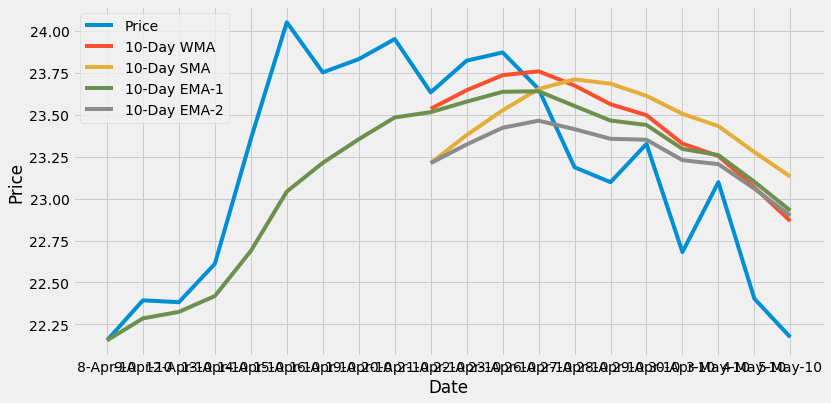

In [44]:
#Plotting to show the differences
plt.figure(figsize = (12,6))
plt.plot(df_moving['Price'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.plot(sma10, label="10-Day SMA")
plt.plot(ema10, label="10-Day EMA-1")
plt.plot(ema10alt, label="10-Day EMA-2")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
#WMA seems to be the most responsive 